In [50]:
#kütüphaneleri import edildi.
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [79]:
#veri seti tanımlandı ve kondtrol edildi.
import pandas as pd

# Veriyi oku
df = pd.read_csv("/Users/mustafacitak/Desktop/Python/ML/ML_Calisma/Iris.csv")

# Veriyi göster
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


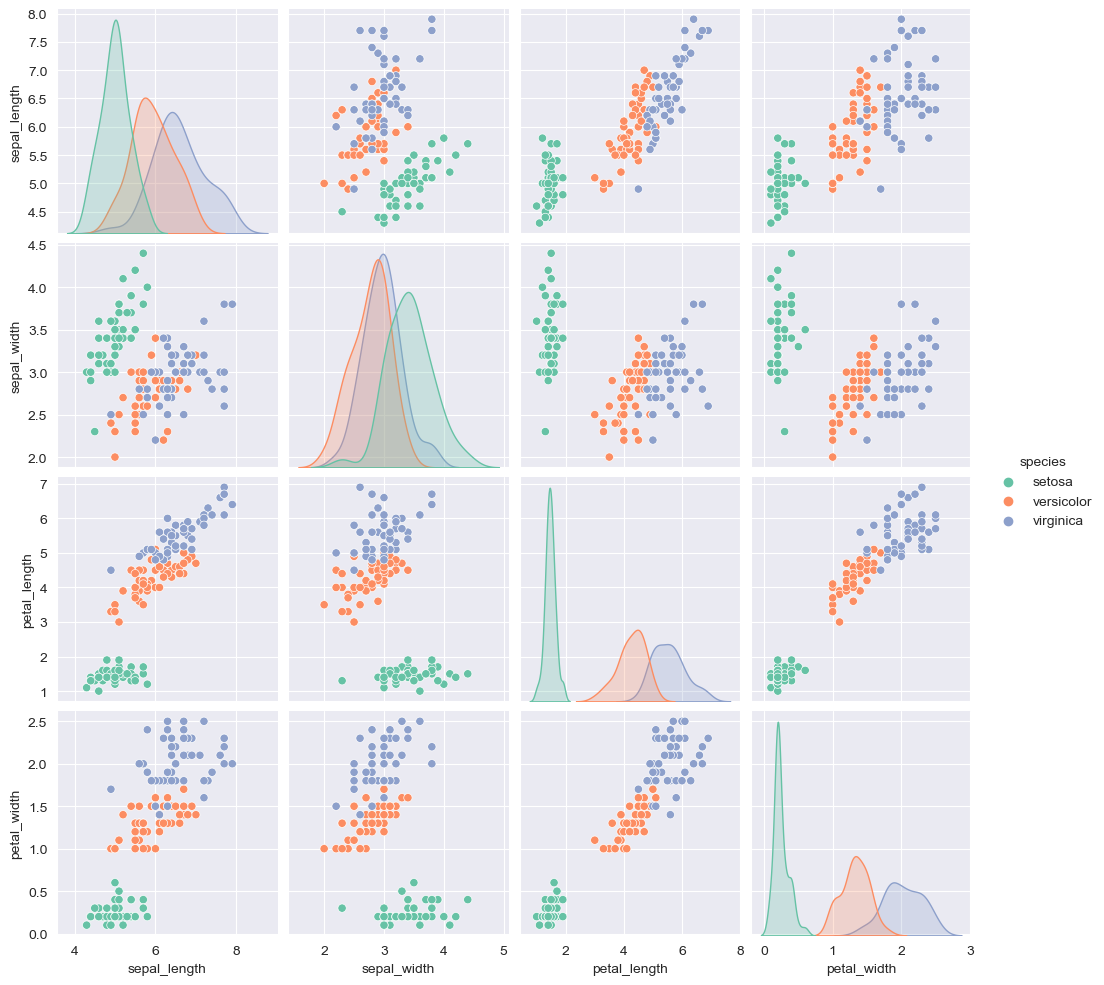

In [81]:
sns.pairplot(iris1, hue='species', palette='Set2')
plt.show()

In [85]:
# Veri setinde X ve Y değişkenleri belirlendi.
X = df.drop(columns=['Species'])
y = df['Species']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modelini oluştur ve eğit
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = svm_model.predict(X_test)

# Sınıflandırma raporu ve doğruluk skoru ile Model performansını değerlendir
print("SVM Model Performansı:")
print(classification_report(y_test, y_pred))
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))

SVM Model Performansı:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Doğruluk Skoru: 1.0


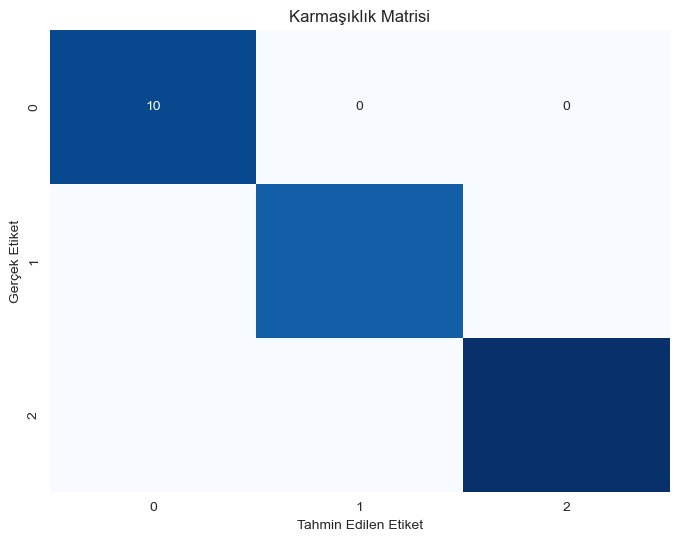

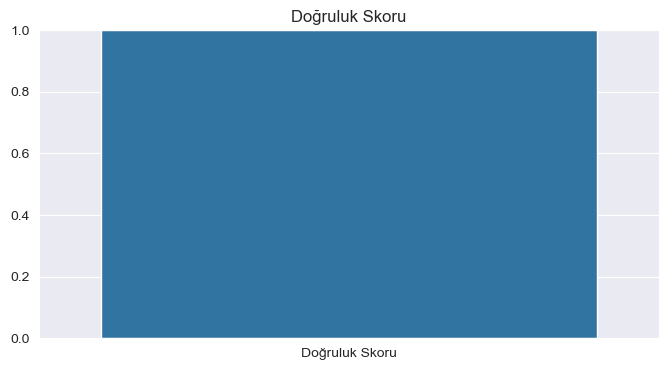

In [86]:
# Karmaşıklık matrisini oluştur
cm = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karmaşıklık Matrisi')
plt.show()

# Doğruluk skorunu görselleştir
plt.figure(figsize=(8, 4))
sns.barplot(x=['Doğruluk Skoru'], y=[accuracy_score(y_test, y_pred)])
plt.ylim(0, 1)
plt.title('Doğruluk Skoru')
plt.show()
